# Regression Task - Dress Rental Prices

# ***Monish Gosar - J025***

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('dress_rental_prices.csv',index_col=0)
df.head()

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47


In [48]:
df.Catagories.unique()

array(['dresses', nan, 'dresses, midi', ...,
       'dresses, Vinyl-PVC-Synthetics, Smart, Formal, Winter, Seasonal, mini, V-Necks',
       'dresses, Cotton-Jersey, Tie-Front, Skinny-Fit, Smart, Formal, Summer, midi, Pencil, Monochrome',
       'dresses, Wool-Cashmere, Horizontal Stripe, Casual, Winter, mini, Short Sleeve'],
      dtype=object)

In [52]:
df.isna().sum()

ID              0
Name            2
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64

In [54]:
df.head()

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47


In [56]:
df.dropna(inplace=True)

In [58]:
df['Price'].describe()

count    29881.000000
mean        61.656203
std         38.149908
min         11.000000
25%         40.000000
50%         51.000000
75%         69.000000
max        793.000000
Name: Price, dtype: float64

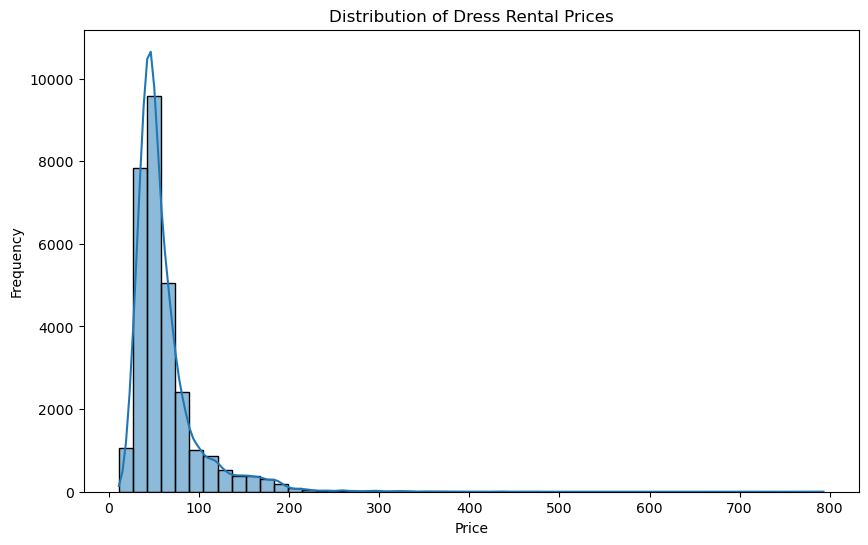

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50,kde=True)
plt.title('Distribution of Dress Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29881 entries, 0 to 29996
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          29881 non-null  int64 
 1   Name        29881 non-null  object
 2   Brand       29881 non-null  object
 3   Colour      29881 non-null  object
 4   Catagories  29881 non-null  object
 5   Price       29881 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [64]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categories_encoded = encoder.fit_transform(df['Catagories'].values.reshape(-1, 1))

In [68]:
X = df[['Brand', 'Colour', 'Price']].copy()
X = pd.get_dummies(X, columns=['Brand', 'Colour'])
X = np.hstack((X, categories_encoded))

In [70]:
y = df['Price']  

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)

In [79]:
train_loss = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)

In [80]:
print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

Train MSE: 90.5358
Test MSE: 92.8742


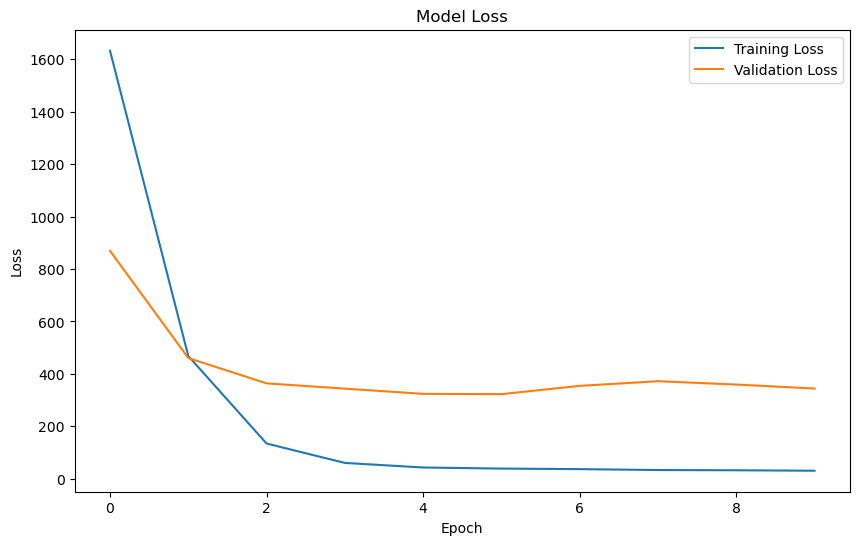

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()